In [72]:
import pickle
import shap
from matplotlib import pyplot as plt
# Visualising local predictions
shap.initjs()

## AD/NC Classification

### Load AD/NC model

In [7]:
rf, X_train, X_test, y_train, y_test = pickle.load(open('models/ADNI_AD_NC', 'rb'))

In [8]:
explainer = shap.TreeExplainer(rf)

# shap_values[1] is the SHAP values for the positive class (Patient with AD) & shap_values[0] is SHAP values for the negative class (No AD)
shap_values = explainer.shap_values(X_test)

### Global Interpretation

Visualising global feature contributions...


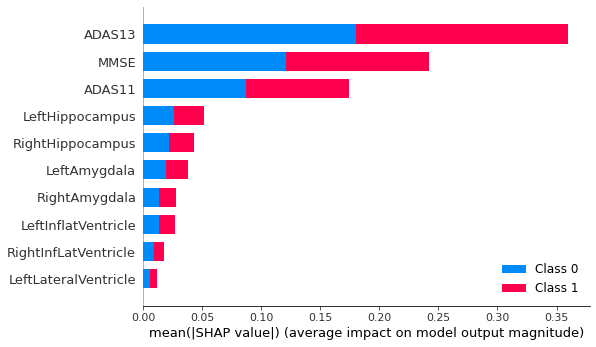

In [55]:
# Overall plot of importance for each feature
print("Visualising global feature contributions...")
test_range = X_test

# shap_values = explainer.shap_values(test_range)
shap.summary_plot(shap_values, X_test, max_display = 10, show=False)
plt.savefig('plots/AD_GlobalFeatureContr.png', bbox_inches="tight")

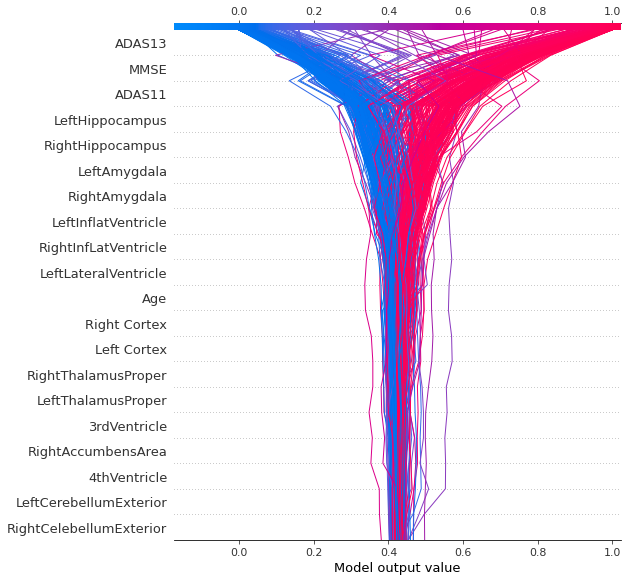

In [10]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], test_range)

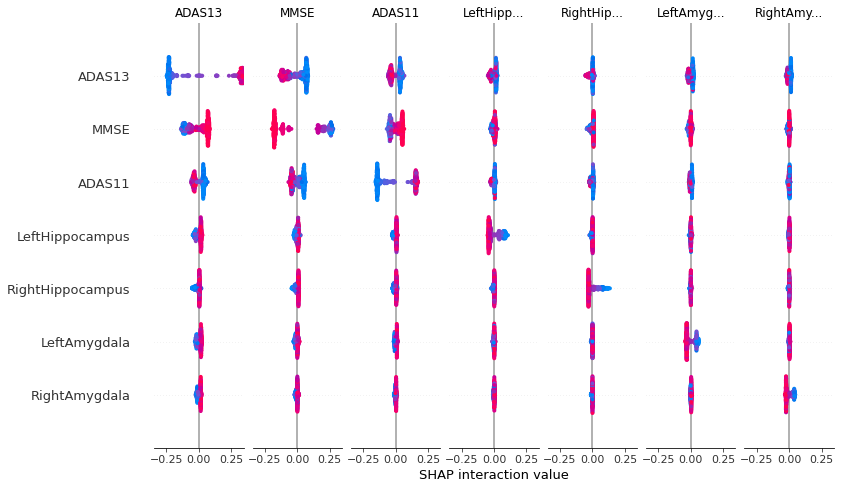

In [11]:
shap_interaction_values = explainer.shap_interaction_values(test_range)
shap.summary_plot(shap_interaction_values[1], test_range)

#### Dependence plots

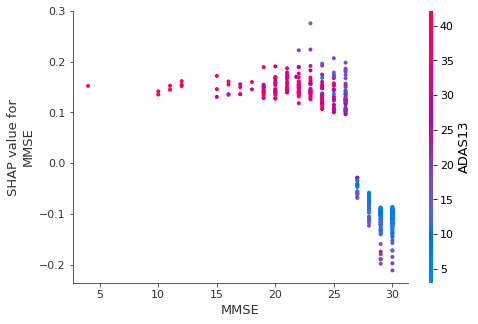

In [56]:
shap.dependence_plot(2, shap_values[1], test_range, show=False)
plt.savefig('plots/AD_MMSE_FeatureDep.png', bbox_inches="tight")

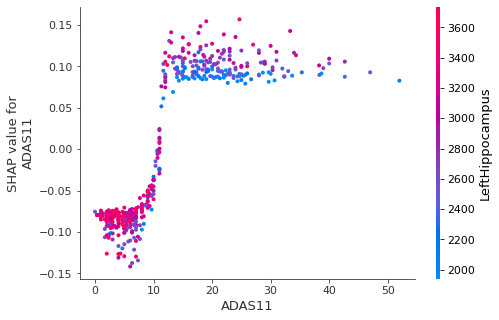

In [57]:
shap.dependence_plot(3, shap_values[1], test_range, show=False)
plt.savefig('plots/AD_ADAD11_FeatureDep.png', bbox_inches="tight")

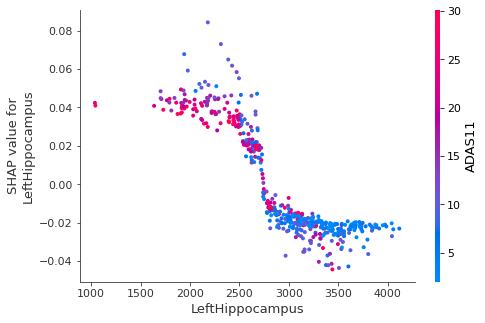

In [58]:
shap.dependence_plot(22, shap_values[1], test_range, show=False)
plt.savefig('plots/AD_LHipp_FeatureDep.png', bbox_inches="tight")

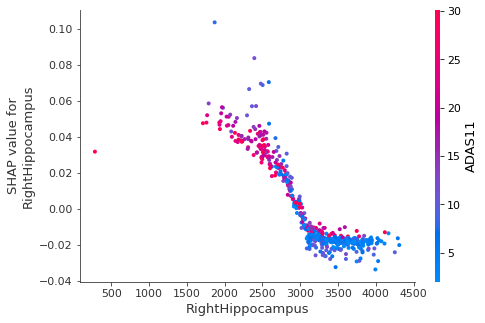

In [66]:
shap.dependence_plot(21, shap_values[1], test_range, show=False)
plt.savefig('plots/AD_RHipp_FeatureDep.png', bbox_inches="tight")

### Local Interpretation

In [64]:
def test_patient_fp(tp):
    test_patient = X_test[tp:tp+1]
    shap_values = explainer.shap_values(test_patient)

    prediction = rf.predict(test_patient)[0]
    if prediction == 0:
        classification = "NC"
    else:
        classification = "AD"
    print(f"Random forest model predicted: {prediction} ({classification})")
    #shap.force_plot(explainer.expected_value[1], shap_values[1], test_patient)
    shap_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], test_patient, show=False)
    plt.savefig('plots/Individual1.png', bbox_inches="tight")
    return shap_plot

In [65]:
test_patient_fp(1)

Random forest model predicted: 0 (NC)


<Figure size 432x288 with 0 Axes>

In [18]:
test_patient_fp(80)

Random forest model predicted: 1 (AD)
